<a href="https://colab.research.google.com/github/Luke-Williams-01/Luke-Williams-01/blob/main/CA2_C1927870_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Data Analysis - Coursework 2 (50%)
# Analysing gravitational wave signals 
## Deadline Friday week 11, 2pm.

#### Instructions

This coursework assesses learning outcomes from **all Chapters** of the course, but in particular **Chapters 6, 7, 8 and 9**. It is worth 50% of the module. Please ensure you have read the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2022/blob/master/blended_exercises/Chapter8/Chapter8.ipynb) before starting this coursework. 

**These assessments are equivalent to an exam**:
- Submit your work via Turn-It-In on Learning Central. Note that you will need to upload your final notebook exported as a html file. **Don't forget to click `run all` before you export it**. You can constantly update this document until the deadline.
- The breakdown of the assessment criteria is provided in Learning Central under Assessment.
- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer.
- Please also take note of the University’s policy on **plagiarism**, which is outlined in your student handbook.

#### Tips


- Explain all your reasoning for each step. A *significant fraction* of the marks are given for explanations and discussion, as they evidence understanding of the analysis.  
- Some of these steps will take a while to run and compile. It's a good idea to add in print statements to your code throughout eg `print('this step is done')` to make sure that your bit of code has finished.
- Add the import packages statements at the top of your Jupyter notebook. We will use the `pandas` package to read in the data, with eg `dataIn=pd.read_csv('filename.csv')`.
- You may need to do some additional research into this subject. You may find it useful to look at the following publication from the LIGO consortium. https://arxiv.org/pdf/1608.01940.pdf

***

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
%matplotlib inline 

## Part A - Some background [15 marks]

**Answer:**

1. How do astronomers know that the gravitational waves from the GW150914 event were due
to two black holes merging?

  [2 marks]

The value of the chirp mass implies the mass of each individual compact object is 35 M$_{☉}$. Making the assumption that the objects have no spin and the orbit remains Keplerian allows for an estimation of the separation of the objects at peak amplitude.

This is found to be ~350 km, this is a very small distance that requires the objects merging to be very small- or the merger would have happened far sooner.

This restricts the merging objects to be compact and therefore very small and dense, we can dismiss Neutron star mergers here as we have a total and individual mass estimate. Neutron stars will collapse into black holes at masses ~ 3 M$_{☉}$, our mass estimate is far above this, leaving us with the conclusion that this must be a merger event involving two black holes.

2. Describe the different parts of the waveform produced due to gravitational waves from a
merging black hole event.

  [3 marks]

3. The file `gravitationalwaveevents.csv` contains the properties of previously observed gravitational waves. Ultimately, we will aim to compare your merger event results with the properties from previously observed gravitational waves. Parameters obtained for these systems
are known as posteriors as they are derived using Bayes Theorem (ie posterior = likelihood
× prior). The errors in these values are the credible intervals from the posterior distribution
derived for each parameter. 
Plot the total mass (given in solar masses, 1M$_{solar}$ = 1.99×10$^{30}$ kg)
of the merging sources against their distance (given in units of Mpc, 1 pc = 3 × 10$^{16}$m).

  [10 marks]

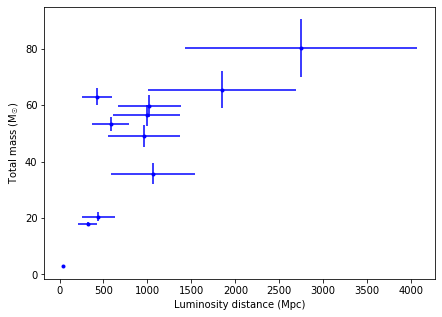

In [2]:
# Reading in the data and plotting 
GW_events = pd.read_csv('gravitationalwaveevents.csv')
#print(GW_events)

# Luminosity distance (distance from observers to merger event)
DL_Mpc = GW_events['DL']
# Luminosity distance errors
DL_Mpc_error = GW_events['DL_err']
# Total mass
Mtot_MS = GW_events['Mtot']
# Total mass errors 
Mtot_MS_error = GW_events['Mtot_err']

# Plotting total mass against distance
plt.figure(figsize=(7, 5))
#plt.plot(DL_Mpc, Mtot_MS, 'b.')
plt.errorbar(DL_Mpc, Mtot_MS, yerr = Mtot_MS_error, xerr = DL_Mpc_error, fmt='b.')
plt.xlabel('Luminosity distance (Mpc)')
plt.ylabel('Total mass (M$_{☉}$)');

In [3]:
print(np.mean(Mtot_MS))
#std
#correlation coefficient of this data (spearman)

45.86363636363637


***

## Part B - The data [15 marks]

**Answer:**

1. Read in the datafile of the observed waveform Observedwaveform.csv. These files store the
strain as a function of ”GPS time” for the merger of two bodies.

  [5 marks]

In [4]:
# Reading in the datafile
Obs_waveform = pd.read_csv('Observedwaveform.csv')
print(Obs_waveform)
# Time
obs_t = Obs_waveform['time (s)']
# Strain
obs_strain = Obs_waveform['strain']

           strain      time (s)
0    8.101405e-23  1.205952e+09
1    1.019082e-22  1.205952e+09
2    1.226521e-22  1.205952e+09
3    1.396412e-22  1.205952e+09
4    1.522380e-22  1.205952e+09
..            ...           ...
631  8.309607e-24  1.205952e+09
632 -1.486847e-23  1.205952e+09
633 -2.480454e-23  1.205952e+09
634 -1.817704e-23  1.205952e+09
635  8.280734e-25  1.205952e+09

[636 rows x 2 columns]


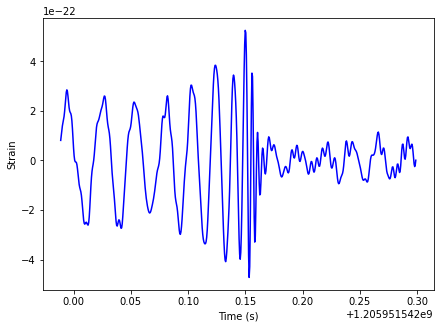

In [5]:
# Visualising the data
plt.figure(figsize=(7, 5))
plt.plot(obs_t, obs_strain, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Strain');

In [6]:
# Basic statistics
mu_strain = np.mean(obs_strain)
std_strain = np.std(obs_strain)
print(mu_strain, std_strain)

4.054760337414344e-24 1.61176838421527e-22


2. The GPS time of the merger for your waveform is 1205951542.153363. Your data will need to
be shifted so that the merger occurs at time = 0 secs. This is required for when we compare
2
model waveforms with our data as the model waveforms are simulated with the merger at
t=0s.

  [4 marks]

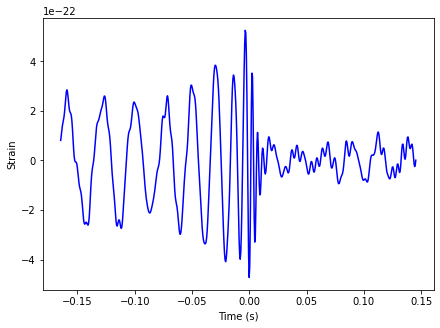

In [7]:
# GPS merger time
t_GPS = 1205951542.153363
# Shifting the data to make the merger occur at t=0
t_shift = obs_t - t_GPS

# Visualising the data (now with shifted time)
plt.figure(figsize=(7, 5))
plt.plot(t_shift, obs_strain, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Strain');

3. We need to estimate the average noise and its standard deviation in our data. This requires
careful thought about where the noise can be seen in the waveform.

  [6 marks]

The strain theoretically should be zero (or close to zero) after the ringdown of the binaries (post-merger event), therefore most of the noise present in the data will be generated in the part of the waveform after t = 0

389   -8.261214e-24
390   -1.853565e-23
391   -3.077235e-23
392   -4.371701e-23
393   -5.527062e-23
           ...     
631    8.309607e-24
632   -1.486847e-23
633   -2.480454e-23
634   -1.817704e-23
635    8.280734e-25
Name: strain, Length: 247, dtype: float64


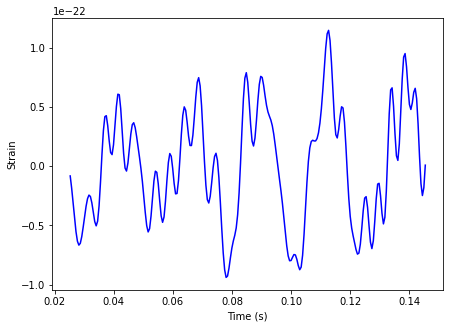

In [8]:
# Taking the portion of the waveform that contains the noise
noisy_t = t_shift[t_shift >= 0.025]
noisy_s = obs_strain[t_shift >= 0.025]

# Plotting the part of the waveform after t = 0
plt.figure(figsize=(7, 5))
plt.plot(noisy_t, noisy_s, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Strain');
print(noisy_s)

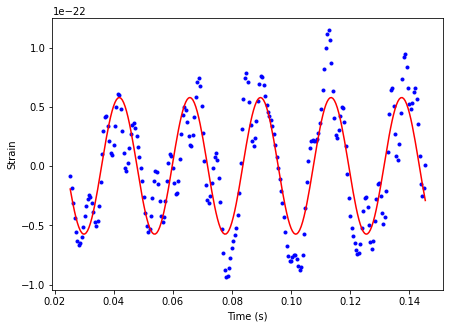

In [9]:
# Number of points
N = 1000 # number of points
time = noisy_t # time array containing the noisy part of the signal
strain = noisy_s # strain array containing the noisy part of the signal

# Defining a simple sine function
def sine(x, freq, amplitude, phase, offset):
    return np.sin(x * freq + phase) * amplitude + offset

# Guess parameters for the sine function
p_freq = 300
p_amplitude = 1e-22
p_phase = 0
p_offset = np.mean(strain)

p0=[p_freq, p_amplitude,
    p_phase, p_offset]

# Using curve_fit to fit the function the data
popt, pcov = curve_fit(sine, time, strain, p0=p0)
strain_fit = sine(time, *popt)
new_t = np.linspace(0, 4*np.pi, len(strain_fit))

# plotting the sine curve with determined parameters over the noisy data
plt.figure(figsize=(7, 5))
# Plotting the data
plt.plot(noisy_t, strain, 'b.')
# Plotting the fit
plt.plot(noisy_t, strain_fit, 'red');
plt.xlabel('Time (s)')
plt.ylabel('Strain');

In [10]:
# We deduct the sine wave from the noisy part of the data to reduce it (close) to zero
delta_strain = strain - strain_fit
# We can now take the mean and standard deviation of the data, having removed the noise:
x_bar_noisy = np.mean(delta_strain)
x_bar_old = np.mean(strain)
std_noisy = np.std(delta_strain)
std_old = np.std(strain)
print("Mean strain before fitting the sine curve was", x_bar_old)
print("Mean strain after subtracting the sine curve", x_bar_noisy)
print("Sigma strain before fitting the sine curve", std_old)
print("Sigma strain after subtracting the sine curve", std_noisy)

Mean strain before fitting the sine curve was 1.0093390475326128e-26
Mean strain after subtracting the sine curve 7.3712175456480445e-31
Sigma strain before fitting the sine curve 4.804318767654249e-23
Sigma strain after subtracting the sine curve 2.5595545518443338e-23


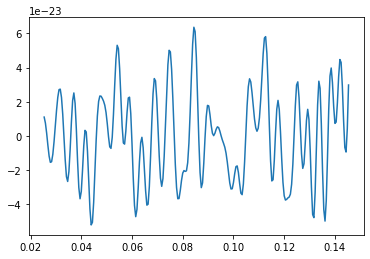

In [11]:
plt.plot(noisy_t, delta_strain)

***

## Part C - Interpolate reference model to match the observed data time sampling [15 marks]

**Answer:**

1. Open the mock data file (`mockData_Mtot40Msun_Dist1Mpc.csv`) using the pandas package. Our data waveform starts at some time
tmin. Find out what this is. Next, take your observed data waveform and output data for t > tmin and t < 0 (ie only keep information for times ≤ 0 (before the merger), or for times
where there is data). Verify, by plotting, that your new observed waveform only has data in
this restricted time range.

  [5 marks]


In [12]:
# Reading in the data and plotting 
# Merger event with total mass 40Msun with distance 1Mpc
mockData_Mtot40 = pd.read_csv('mockData_Mtot40Msun_Dist1Mpc.csv')
print(mockData_Mtot40)

           strain  time (s)
0    1.545156e-19 -0.164658
1    1.171263e-19 -0.164170
2    1.082966e-19 -0.163681
3    1.389174e-19 -0.163193
4    2.190045e-19 -0.162704
..            ...       ...
435  4.084157e-20  0.047745
436  5.685491e-20  0.048233
437  3.490659e-20  0.048722
438 -9.513503e-20  0.049209
439  2.941420e-20  0.049698

[440 rows x 2 columns]


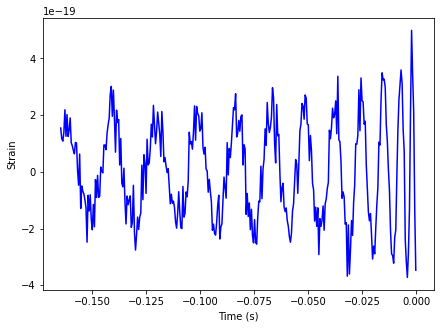

In [13]:
# Sorting into arrays
mock_strain_Mtot40 = mockData_Mtot40['strain']
mock_time_Mtot40 = mockData_Mtot40['time (s)']
# Taking the data where the time =< 0
mock_strain_t0 = mock_strain_Mtot40[mock_time_Mtot40 <= 0]
mock_time_t0 = mock_time_Mtot40[mock_time_Mtot40 <= 0]
# Plotting 
plt.figure(figsize=(7, 5))
plt.plot(mock_time_t0, mock_strain_t0, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Strain');

2. Open the reference file using the pandas package (`reference_Mtot40Msun_Dist1Mpc.csv`). We want to convert our reference waveform
to have the same time sampling, ie the same number of x data points as our data (in this
question, our mock data). We need to interpolate the reference waveform to match the time
samples of the data. To do this use the following code:
assuming ref_x[index] and ref_y[index] are the reference data (time and strain respectively) and data_x is the observed data you wish to match the x axis for (this would be
mock_x for this question):

  `from scipy.interpolate import interp1d`

  get interpolation object using a reference waveform with ref_x (time) and ref_y (strain).

  `interp_fn = interp1d(ref_x[index],ref_y[index],bounds_error=False)`

  now interpolate the data waveform

  `interp_strain = interp_fn(data_x)`

  plot

  `plt.plot(data_x,interp_strain)`

  Briefly verify that this works.

  [10 marks]


In [14]:
# Importing interpolate
from scipy.interpolate import interp1d

# Reading in the data and plotting 
# Merger event with total mass 40Msun with distance 1Mpc
refData_Mtot40 = pd.read_csv('reference_Mtot40Msun_Dist1Mpc.csv')
print(refData_Mtot40)

             strain   time (s)
0     -6.162294e-20 -11.946102
1     -6.140841e-20 -11.945614
2     -6.113607e-20 -11.945126
3     -6.080617e-20 -11.944637
4     -6.041902e-20 -11.944149
...             ...        ...
24617  0.000000e+00   0.073917
24618  0.000000e+00   0.074406
24619  0.000000e+00   0.074894
24620  0.000000e+00   0.075382
24621  0.000000e+00   0.075871

[24622 rows x 2 columns]


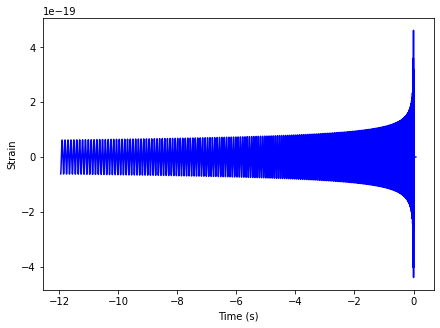

In [15]:
# Sorting into arrays
ref_strain_Mtot40 = refData_Mtot40['strain']
ref_time_Mtot40 = refData_Mtot40['time (s)']
# Plotting 
plt.figure(figsize=(7, 5))
plt.plot(ref_time_Mtot40, ref_strain_Mtot40, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Strain');

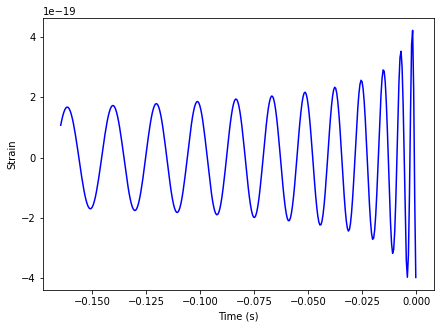

In [16]:
# Finding the interpolation object
interp_fn = interp1d(ref_time_Mtot40, ref_strain_Mtot40, bounds_error=False)
# Interpolating the data waveform
interp_strain = interp_fn(mock_time_t0)
# Plotting the interpolated data
plt.figure(figsize=(7, 5))
plt.plot(mock_time_t0, interp_strain, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Strain');

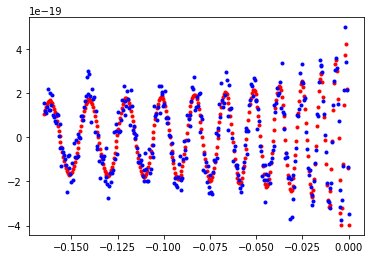

In [17]:
# Plotting the interpolated waveform and the mock data on the same axis
plt.plot
plt.plot(mock_time_t0, interp_strain, 'r.', label="interpolated data")
plt.plot(mock_time_t0, mock_strain_t0, 'b.', label="mock data");

Comment on this graph

***

## Part D - Using model waveforms to estimate the total mass and distance to the system "a by-eye estimate") [24 marks]

**Answer**

1. Write a function in python to produce the time t and strain h of a general waveform with
q = 1, total mass M and distance D from the interpolation object you created above, using
the equations for how the waveform strain and time depends on mass and distance from the
Chapter 8 Jupyter Notebook.

  [10 marks]

Time and strain have a dependency on mass and distance. Intially we look at the relationship between the reference time and the time of the waveform and how this dependes on mass:

$$t_{\rm {ref}}=\left(\dfrac{M_{\rm {ref}}}{M}\right)t$$

We define the time, $t=0$ as being the time at which the merger event occurred. The mass and time of the waveform can be related to the distance (and therefore reference distance of a merger via:

$$h(t,M,D) = \left(\dfrac{M}{M_{\rm {ref}}}\right) \left(\dfrac{D_{\rm {ref}}}{D}\right) h(t_{\rm {ref}})$$

This is reproduced as a python function below:

In [18]:
def y_data(M, ref_M, D, ref_D, ref_t):
  time = (ref_M / M) * ref_t
  h = (M / ref_M) * (ref_D / D) * interp_fn(time)
  return h

In [19]:
ref_M = 40 # solar masses
ref_D = 1 # Mpc
ref_t = ref_time_Mtot40
ref_strain = ref_strain_Mtot40
# Constants
M = 40 # solar masses
D = 1 # Mpc

In [20]:
# plot the 40M, Distance = 1 Mpc

2. Test your function works by substituting in values of M = 70 Msun and D = 5Mpc, and compare your resulting waveform with the mock data in `mockData_Mtot70Msun_Dist5Mpc.csv`.
Comment on your result.

  [6 marks]

In [21]:
# Importing the mock data with 70 solar masses and a distance 5 Mpc
mockData_Mtot70 = pd.read_csv('mockData_Mtot70Msun_Dist5Mpc.csv')
mock_strain_Mtot70 = mockData_Mtot70['strain']
mock_time_Mtot70 = mockData_Mtot70['time (s)']

In [22]:
ref_M = 40 # solar masses
ref_D = 1 # Mpc
ref_t = mock_time_Mtot70
ref_strain = mock_strain_Mtot70
# Constants
M = 70 # solar masses
D = 5 # Mpc

In [23]:
# Using the functions to create a time array and a strain array
Estimate_strain_70 = y_data(M, ref_M, D, ref_D, ref_t)

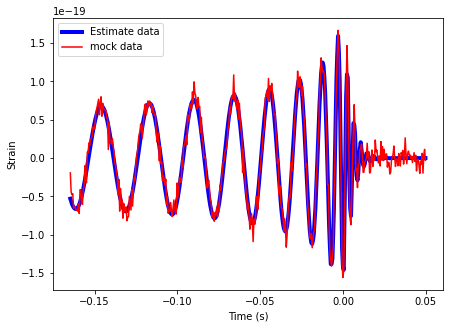

In [24]:
# Plotting the interpolated data
plt.figure(figsize=(7, 5))
# Plotting the data found from the strain and time equations
plt.plot(mock_time_Mtot70, Estimate_strain_70, 'b-', linewidth=4, label='Estimate data')
# Plotting the reference strain and reference time
plt.plot(mock_time_Mtot70, mock_strain_Mtot70, 'r-', label="mock data")
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend(loc='upper left')
#plt.xlim(-0.15, 0); # change the arrays to chop off data after t = 0

3. Use your function to scale the reference waveform (M = 40Msun, D = 1Mpc) to make an
initial rough estimate ”by eye” of the total mass and distance that ”best” fits your data (e.g.
to within +/- 5 Msun, +/- 100 Mpc).

  [8 marks]

In [25]:
'''
# Constants

# Arrays to 
# Mass and eccentricity 1d arrays
mass_array = np.linspace(50, 150, 10)
print(mass_array)
distance_array = np.linspace(100, 1500, 15)
matches = np.zeros((10, 15))
# Double for loop over mass and eccentricity
for i, j in enumerate(mass_array):
    for k, m in enumerate(distance_array):
      Estimate_strain_n = y_data(M[j], ref_M, D[m], ref_D, ref_t)
'''  

'\n# Constants\n\n# Arrays to \n# Mass and eccentricity 1d arrays\nmass_array = np.linspace(50, 150, 10)\nprint(mass_array)\ndistance_array = np.linspace(100, 1500, 15)\nmatches = np.zeros((10, 15))\n# Double for loop over mass and eccentricity\nfor i, j in enumerate(mass_array):\n    for k, m in enumerate(distance_array):\n      Estimate_strain_n = y_data(M[j], ref_M, D[m], ref_D, ref_t)\n'

In [26]:
# Constants
ref_M = 40 # solar masses
ref_D = 1 # Mpc
ref_t = t_shift
ref_strain = obs_strain
# Constants (by eye)
M = 75 # solar masses
D = 1500 # Mpc

# Running the function to find strain with the intial rough estimate
Estimate_strain_n = y_data(M, ref_M, D, ref_D, ref_t)

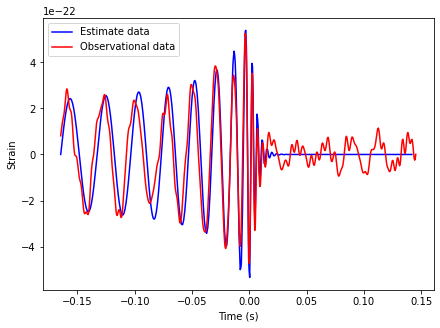

In [27]:
plt.figure(figsize=(7, 5))
# Plotting the data found from the strain and time equations
plt.plot(t_shift, Estimate_strain_n, 'b-', label='Estimate data')
# Plotting the reference strain and reference time
plt.plot(t_shift, obs_strain, 'r-', label="Observational data")
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend(loc='upper left')
#plt.xlim(-0.15, 0); # limit the data to before t = 0

***

## Part E - Estimating the total mass using MCMC [75 marks]

**Answer:**

1. Choose one out of the following options and create an MCMC to sample the parameter(s).

  **Option 1** Use MCMC to sample the total mass and find the ”best value”.

  [20 marks]

  OR

  **Option 2** Use MCMC to sample the total mass and distance to find the ”best values”.

  [40 marks]

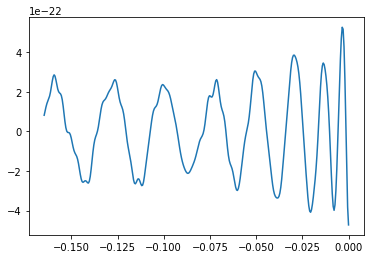

In [28]:
from scipy.stats import norm

posterior_mean= x_bar_noisy
posterior_std= std_noisy

D_xbar = np.mean(Estimate_strain_n)
D_sigma = np.std(Estimate_strain_n)
S_xbar = 70

observ_strain = obs_strain[t_shift <= 0]
observ_time = t_shift[t_shift <= 0]
plt.plot(observ_time, observ_strain);

In [29]:
# useful arrays
# obs
obs_tcut = t_shift[t_shift <= 0.025]
obs_hcut = obs_strain[t_shift <= 0.025]

In [30]:
# Constants
ref_M = 40 # solar masses
ref_D = 1 # Mpc
ref_t = obs_tcut
ref_strain = obs_hcut
# Constants
M = 75 # solar masses
D = 1500 # Mpc

# Running the function to find strain with the intial rough estimate
Estimate_strain_n = y_data(M, ref_M, D, ref_D, ref_t)

# model
model_t = obs_tcut
model_h = Estimate_strain_n

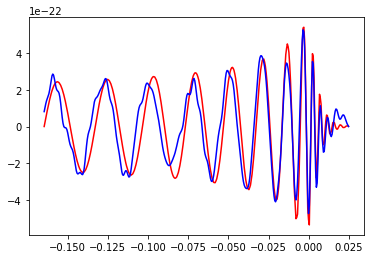

In [31]:
plt.plot(obs_tcut,Estimate_strain_n, 'r-')
plt.plot(obs_tcut,obs_hcut, 'b-')

To do this, we **make chi-square the distribution of space we need to sample**.

Here your likelihood is the chi-square function - best to use so-called “log likelihood” given the exponential term can get tricky with computers. The log likelihood for chi-square is given by

> $ \mbox{log likelihood} = -0.5 \dfrac{\sum(y_i-y_{\rm model})^2}{\sigma^2}$.

In [32]:

# Finding log(likelihood)
#yi = strain (obs)
#ymodel = strain (model)
#sigma = std of model
'''
sig_model = np.std(model_h)

def chi(yi, ymodel, sig_model):
  numerator = np.sum((yi - ymodel)**2)
  denominator = sig_model**2
  return -0.5 * (numerator / denominator)

log_likelihood = chi(obs_hcut, model_h, sig_model)
'''

'\nsig_model = np.std(model_h)\n\ndef chi(yi, ymodel, sig_model):\n  numerator = np.sum((yi - ymodel)**2)\n  denominator = sig_model**2\n  return -0.5 * (numerator / denominator)\n\nlog_likelihood = chi(obs_hcut, model_h, sig_model)\n'

In [33]:
# Mass ONLY
# define a function for the probability

# prob(posterior) = log(likelihood) (fit of model (chi squared)) x prior (noise from original (gaussian distribution))
# posterior = likelihood x prior
# model - data = residuals = all noise, taking the mean of this gives the mean of the waveform
# find residuals between model vs observed
# find probability between the model fit and observed data (highest probability between the mean noise and model)
# as likelihood is log, we need to log the prior and the instead of * we + and instead / we - 
'''
x_bar_noisy = np.mean(delta_strain)
x_bar_old = np.mean(strain)
std_noisy = np.std(delta_strain)
std_old = np.std(strain)

def prob(log_likelihood, model_h, obs_hcut, x_bar_old, std_old):
  residuals = model_h - obs_hcut
  mu_residuals = np.mean(residuals)
  gauss = norm.pdf(mu_residuals, x_bar_old, std_old) # norm.pdf(theta,mu_0,s_0)
  log_prior = np.log10(gauss)
  return log_likelihood + log_prior

log_posterior = prob(log_likelihood, model_h, obs_hcut, x_bar_old, std_old)

# below is the same as above but in more general terms
def posterior(theta): 
    data = observ_strain
    X_hat=np.mean(data)
    n = len(data)
    var = posterior_std**2 
    sig = np.sqrt(var)/np.sqrt(n)
    mu_0 =  D_xbar # average of distribution
    s_0 = D_sigma # error in the distribution
    val = norm.pdf(theta,X_hat,sig) * norm.pdf(theta,mu_0,s_0)
    return val
'''

'\nx_bar_noisy = np.mean(delta_strain)\nx_bar_old = np.mean(strain)\nstd_noisy = np.std(delta_strain)\nstd_old = np.std(strain)\n\ndef prob(log_likelihood, model_h, obs_hcut, x_bar_old, std_old):\n  residuals = model_h - obs_hcut\n  mu_residuals = np.mean(residuals)\n  gauss = norm.pdf(mu_residuals, x_bar_old, std_old) # norm.pdf(theta,mu_0,s_0)\n  log_prior = np.log10(gauss)\n  return log_likelihood + log_prior\n\nlog_posterior = prob(log_likelihood, model_h, obs_hcut, x_bar_old, std_old)\n\n# below is the same as above but in more general terms\ndef posterior(theta): \n    data = observ_strain\n    X_hat=np.mean(data)\n    n = len(data)\n    var = posterior_std**2 \n    sig = np.sqrt(var)/np.sqrt(n)\n    mu_0 =  D_xbar # average of distribution\n    s_0 = D_sigma # error in the distribution\n    val = norm.pdf(theta,X_hat,sig) * norm.pdf(theta,mu_0,s_0)\n    return val\n'

In [34]:
x_bar_noisy = np.mean(delta_strain)
x_bar_old = np.mean(strain)
std_noisy = np.std(delta_strain)
std_old = np.std(strain)

#log_likelihood, model_h, obs_hcut, x_bar_old, std_old, yi, ymodel, sig_model
#log_likelihood, model_h, obs_hcut, x_bar_old, std_old, obs_hcut, model_h, sig_model

def log_posterior(M, D):

  # Constants
  ref_M = 40 # solar masses
  ref_D = 1 # Mpc
  ref_t = obs_tcut
  ref_strain = obs_hcut

  # Running the function to find strain with the intial rough estimate
  Estimate_strain_n = y_data(M, ref_M, D, ref_D, ref_t)

  #model
  model_t = obs_tcut
  model_h = Estimate_strain_n

  #obs_hcut, model_h, sig_model
  #yi, ymodel, sig_model
  sig_model = np.std(model_h)
  numerator = np.sum((obs_hcut - model_h)**2)
  denominator = sig_model**2
  log_likelihood =  -0.5 * (numerator / denominator)

  residuals = model_h - obs_hcut
  mu_residuals = np.mean(residuals)
  gauss = norm.pdf(mu_residuals, x_bar_old, std_old) # norm.pdf(theta,mu_0,s_0)
  log_prior = np.log10(gauss)
  return log_likelihood + log_prior

In [46]:
# set up MCMC step paramaters
N_mcmc = 1000
theta_current_mass = np.zeros(N_mcmc+1) # mass
# use our prior as a guess
theta_current_mass[0] = 75 # mass guess (intial)

theta_current_dist = np.zeros(N_mcmc+1) # distance
# use our prior as a guess
theta_current_dist[0] = 1500 # mass guess (intial)

# choose a value for width of normal distribution to get the step in ages
# this is between the prior and the likelihood values
sigma_mcmc_mass = 0.1
sigma_mcmc_dist = 100

In [47]:
for i in range(N_mcmc):
    
    # MASS
    p_current = log_posterior(theta_current_mass[i], theta_current_dist[i]) # put current value in posterior equation
    dtheta = np.random.normal(0,sigma_mcmc_mass) # randomally draw a value of theta to trial 
    theta_proposed = theta_current_mass[i] + dtheta #get new proposed theta (random theta + stepsize)
    p_proposed = log_posterior(theta_proposed, theta_current_dist[i]) # calculate posterior p for proposed theta
    
    #  keep this value if probability proposed theta greater than the current prob
    if p_proposed > p_current: 
        theta_current_mass[i+1] = theta_proposed
    else:
    # if probability lower
    # use the ratios of probability to define probability of whether we move to that value or not
        p_new_move = p_proposed - p_current #remember log likelihood - you cannot divide this only minus
        # generate random number for probability
        log_u_random = np.log10(np.random.uniform(0,1))
        # if u_random < p_new_move, then accept, if not, reject
        if log_u_random <= p_new_move:
            theta_current_mass[i+1] = theta_proposed
        else:
            theta_current_mass[i+1] = theta_current_mass[i]

    # DISTANCE
    p_current = log_posterior(theta_current_mass[i+1], theta_current_dist[i]) # put current value in posterior equation
    dtheta = np.random.normal(0, sigma_mcmc_dist) # randomally draw a value of theta to trial 
    theta_proposed = theta_current_dist[i] + dtheta #get new proposed theta (random theta + stepsize)
    p_proposed = log_posterior(theta_current_mass[i+1], theta_proposed) # calculate posterior p for proposed theta
    
    #  keep this value if probability proposed theta greater than the current prob
    if p_proposed > p_current: 
        theta_current_dist[i+1] = theta_proposed
    else:
    # if probability lower
    # use the ratios of probability to define probability of whether we move to that value or not
        p_new_move = p_proposed - p_current #remember log likelihood - you cannot divide this only minus
        # generate random number for probability
        log_u_random = np.log10(np.random.uniform(0,1))
        # if u_random < p_new_move, then accept, if not, reject
        if log_u_random <= p_new_move:
            theta_current_dist[i+1] = theta_proposed
        else:
            theta_current_dist[i+1] = theta_current_dist[i]

# get mean + std from mcmc generated samples
mean_mcmc_mass=np.mean(theta_current_mass)
std_mcmc_mass=np.std(theta_current_mass)

mean_mcmc_dist=np.mean(theta_current_dist)
std_mcmc_dist=np.std(theta_current_dist)

print('The mean mass from the MCMC is {:.2f} +/- {:.2f} years'.format(mean_mcmc_mass,std_mcmc_mass))
print('The mean distance from the MCMC is {:.2f} +/- {:.2f} years'.format(mean_mcmc_dist,std_mcmc_dist))

The mean mass from the MCMC is 76.93 +/- 0.36 years
The mean distance from the MCMC is 1613.06 +/- 59.59 years


2. Display the results in an appropriate manner and comment on your findings, as well as your
results from the MCMC. Has your MCMC converged?

  [20 marks]

"\nx = np.linspace(10, 100, 1000)\nposterior_mcmc=norm.pdf(x, mean_mcmc_mass, std_mcmc_mass)\n\nplt.subplot(122)\n#plots the analytic posterior\nplt.plot(x,norm.pdf(x,posterior_mean,posterior_std),label='posterior analytical',c='black',lw=2)\n\n# plots the mcmc generated posterior\nplt.hist(theta_current_mass,bins=50,density=True,label='ages from MCMC',alpha=0.6)\nplt.plot(x,posterior_mcmc,label = 'posterior MCMC',c='magenta',lw=4)\nplt.legend(loc='upper left')\n#plt.xlim(160,175)\n#plt.ylim(0,0.25)\nplt.xlabel('Mass (solar masses)')\nplt.ylabel('PDF')\n"

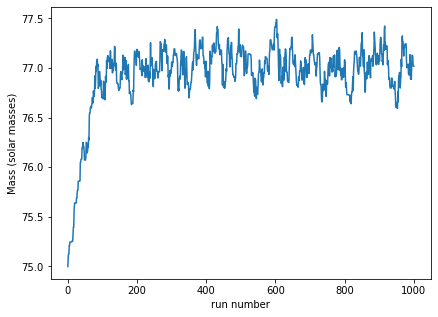

In [48]:
# tip : put the plotting routines outside the cell of the 
# MCMC otherwise you'll need to do your N runs everytime you change a plotting feature
# generate x for plotting

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(theta_current_mass) 
plt.xlabel('run number')
plt.ylabel('Mass (solar masses)')
'''
x = np.linspace(10, 100, 1000)
posterior_mcmc=norm.pdf(x, mean_mcmc_mass, std_mcmc_mass)

plt.subplot(122)
#plots the analytic posterior
plt.plot(x,norm.pdf(x,posterior_mean,posterior_std),label='posterior analytical',c='black',lw=2)

# plots the mcmc generated posterior
plt.hist(theta_current_mass,bins=50,density=True,label='ages from MCMC',alpha=0.6)
plt.plot(x,posterior_mcmc,label = 'posterior MCMC',c='magenta',lw=4)
plt.legend(loc='upper left')
#plt.xlim(160,175)
#plt.ylim(0,0.25)
plt.xlabel('Mass (solar masses)')
plt.ylabel('PDF')
'''

"\nx = np.linspace(10, 100, 1000)\nposterior_mcmc=norm.pdf(x, mean_mcmc_mass, std_mcmc_mass)\n\nplt.subplot(122)\n#plots the analytic posterior\nplt.plot(x,norm.pdf(x,posterior_mean,posterior_std),label='posterior analytical',c='black',lw=2)\n\n# plots the mcmc generated posterior\nplt.hist(theta_current_mass,bins=50,density=True,label='ages from MCMC',alpha=0.6)\nplt.plot(x,posterior_mcmc,label = 'posterior MCMC',c='magenta',lw=4)\nplt.legend(loc='upper left')\n#plt.xlim(160,175)\n#plt.ylim(0,0.25)\nplt.xlabel('Mass (solar masses)')\nplt.ylabel('PDF')\n"

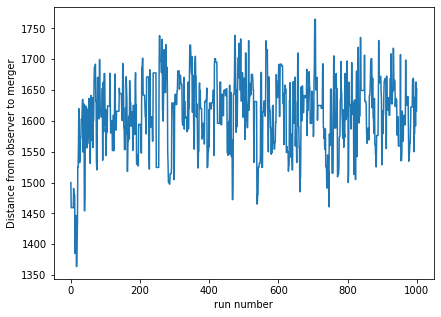

In [49]:
# tip : put the plotting routines outside the cell of the 
# MCMC otherwise you'll need to do your N runs everytime you change a plotting feature
# generate x for plotting

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(theta_current_dist) 
plt.xlabel('run number')
plt.ylabel('Distance from observer to merger')
'''
x = np.linspace(10, 100, 1000)
posterior_mcmc=norm.pdf(x, mean_mcmc_mass, std_mcmc_mass)

plt.subplot(122)
#plots the analytic posterior
plt.plot(x,norm.pdf(x,posterior_mean,posterior_std),label='posterior analytical',c='black',lw=2)

# plots the mcmc generated posterior
plt.hist(theta_current_mass,bins=50,density=True,label='ages from MCMC',alpha=0.6)
plt.plot(x,posterior_mcmc,label = 'posterior MCMC',c='magenta',lw=4)
plt.legend(loc='upper left')
#plt.xlim(160,175)
#plt.ylim(0,0.25)
plt.xlabel('Mass (solar masses)')
plt.ylabel('PDF')
'''

In [50]:
# talk about and plot the above graphs
# see chapter 7 for more analysis

3. Report the median and 90% credible limits on your value of M and comment on your values.
Compare the waveform generated from your MCMC result with the observed waveform.

  [15 marks]

In [40]:
# interpolate with mass and distance from part a, plot with obs waveform and comment

***

## Part F - Putting it all together [36 marks]

**Answer:**

1. Estimate the chirp mass for your system and the individual masses of your merging bodies,
describing your reasoning. Comment on your individual masses.

  [5 marks]


The "Chirp mass" is given by:

$$M_{ch} = \dfrac{(M_1 M_2)^{3/5}}{(M_1 + M_2)^{1/5}}.$$

We are assuming throughout this investigation that the masses of the merging bodies are equal, so the mass ratio, q = 1. For unequal mass merging bodies we would have used the equation:

$$M_{ch} = m_{1} + m_{2} = M_{ch} (1+q)^{6/5} q^{-3/5}$$

In [41]:
m_total = 77
# We assume equal mass for each of the merging bodies, therefore:
m1 = 38.5
m2 = 38.5

# Using these masses to find the chirp mass:

def chirp(m1, m2):
  numerator = (m1 * m2)**(3/5)
  denominator = (m1 + m2)**(1/5)
  return numerator / denominator

M_chirp = chirp(m1, m2)

print("Assuming the mass ratio q = 1, the component masses are both {:.2f} M(solar)" .format(m1))
print("The Chirp mass for the binary merger is {:.2f} M(solar)" .format(M_chirp))

Assuming the mass ratio q = 1, the component masses are both 38.50 M(solar)
The Chirp mass for the binary merger is 33.52 M(solar)


The chirp mass is not the same as the total mass of the system, the chirp mass is the total mass when accounting for energy loss due to the emission of gravitational waves.

2. Estimate the period from your observed waveform around the peak amplitude of the wave.

  [14 marks]

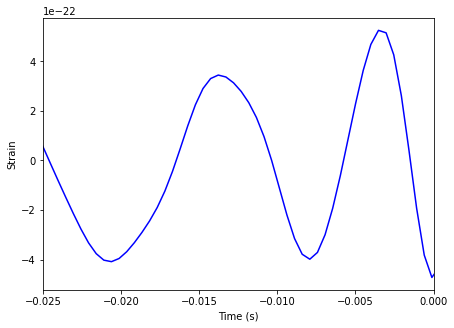

In [42]:
# Plotting the observed waveform:
quiet_t = t_shift[t_shift < 0.01]
quiet_s = obs_strain[t_shift < 0.01]
plt.figure(figsize=(7, 5))
plt.plot(quiet_t, quiet_s, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(-0.025, 0);

In [43]:
# Finding the peak amplitude of our wave:
peak_strain = max(quiet_s)
print()
# Finding the time at the peak strain
peak_time = quiet_t
# The time and the time period are related via
# fit a trig curve to the above graph, use the params 
# f = ~130-150

3. Assuming that the objects are not spinning, and that their orbits are Keplerian and essentially
circular, use your period to estimate the orbital separation in km of the two bodies around
peak amplitude. Think carefully about how the orbital period is related to the period of your
gravitational wave.

  [12 marks]

If the objects are not spinning and they are in circular Keplerian orbits until the merger then we can note that the orbital separation $R$ of the two bodies just before merger (peak amplitude of waveform) would be:

$R = \left(\dfrac{G (M_1+M_2)}{\omega_{\rm max}^2}\right)^{1/3}.$

We can estimate $\omega$ from the waveforms since $\omega$ is related to the period of the gravitational waves. Note that after half a revolution, the two stars have just swapped their positions. The second half of the orbit repeats the motion pattern of the first half, and the gravitational wave signal is therefore repeated accordingly. One orbital period in the graviational waves observed therefore comprises two periods of the gravitational wave signal.

RE-WRITE THIS: all copied from chapter 8 ^^ justification as to why 

We need to calculate $\omega_{\rm max}$ using the time period of our gravitational waves found in part (2). The orbital period of the gravitational waves is related to double the period of the gravitational wave signal. We can use the frequency to create an equation relating the two:

$\omega_{\rm max} = \dfrac{2\pi f_{GW}}{2}$

In [44]:
# w is related to the period of the gravitational waves, however, as it is a binary system, a full orbit is 2 x time period
# Frequency and w are related

fGW = 
w_max = (2*np.pi*fGW) / 2

# We write the equation of the orbital separation as a function:

def sep(m1, m2, w_max):
  # Constants
  G = 6.67*(10**-11) # gravitational constant
  numerator = G*(m1 + m2)
  denominator = w_max**2
  return (numerator / denominator)**(1/3)

# Calling our separation function

R = sep(m1, m2, w_max)
print("The separation between the two merging bodies, when they are at peak amplitude is {:.2f} (Km)" .format(R))

SyntaxError: ignored

4. Comment on what your analysis suggests are the best astrophysical candidates for the merging
objects?

  [5 marks]

Gravitational waves are emitted via the merger event of dense astrophysical objects. The two component masses found in this investigation are assumed (using q = 1) to be of similar mass, x solar masses each.

Astrophysical objects that emit detectable gravitational waves due to merger events are White Dwarf's, Neutron stars and black holes. White Dwarfs have an upper mass limit of 1.44 solar masses- any greater than this and they exceed the Chandrasekhar limit and will collapse into a neutron star or black hole. Neutron stars similar have an upper mass limit of approximately 2 - 3 solar masses, again, past this point they would collapse into black holes.

Therefore we can conclude that the only astrophysical objects that can exist in a binary system with the masses found in this investigation, to create the observed waveform are black holes, each of mass x solar masses.

ADD A FEW REFERENCES AS TO THE UPPER LIMITS OF NEUTRON STARS AND WHITE DWARFS

mention mass ---> size doesn't add up for WD and NS

***

## Part G - Evidence of Understanding, Presentation and Interpretation [20 marks]

An additional 20 marks will be awarded for evidence of understanding and knowledge via (for example) explanations, plots, comments on your results and well formatted and well explained results. Marks are also available for additional investigations carried out on your analysis above. These marks are available for those data analysis reports that show evidence of work that is *very high quality* or *outstanding* as per the decile descriptions in the Assessment Criteria for modules. <div align="right">**[20 marks]**</div>